# Steps

## Open https://makersuite.google.com/

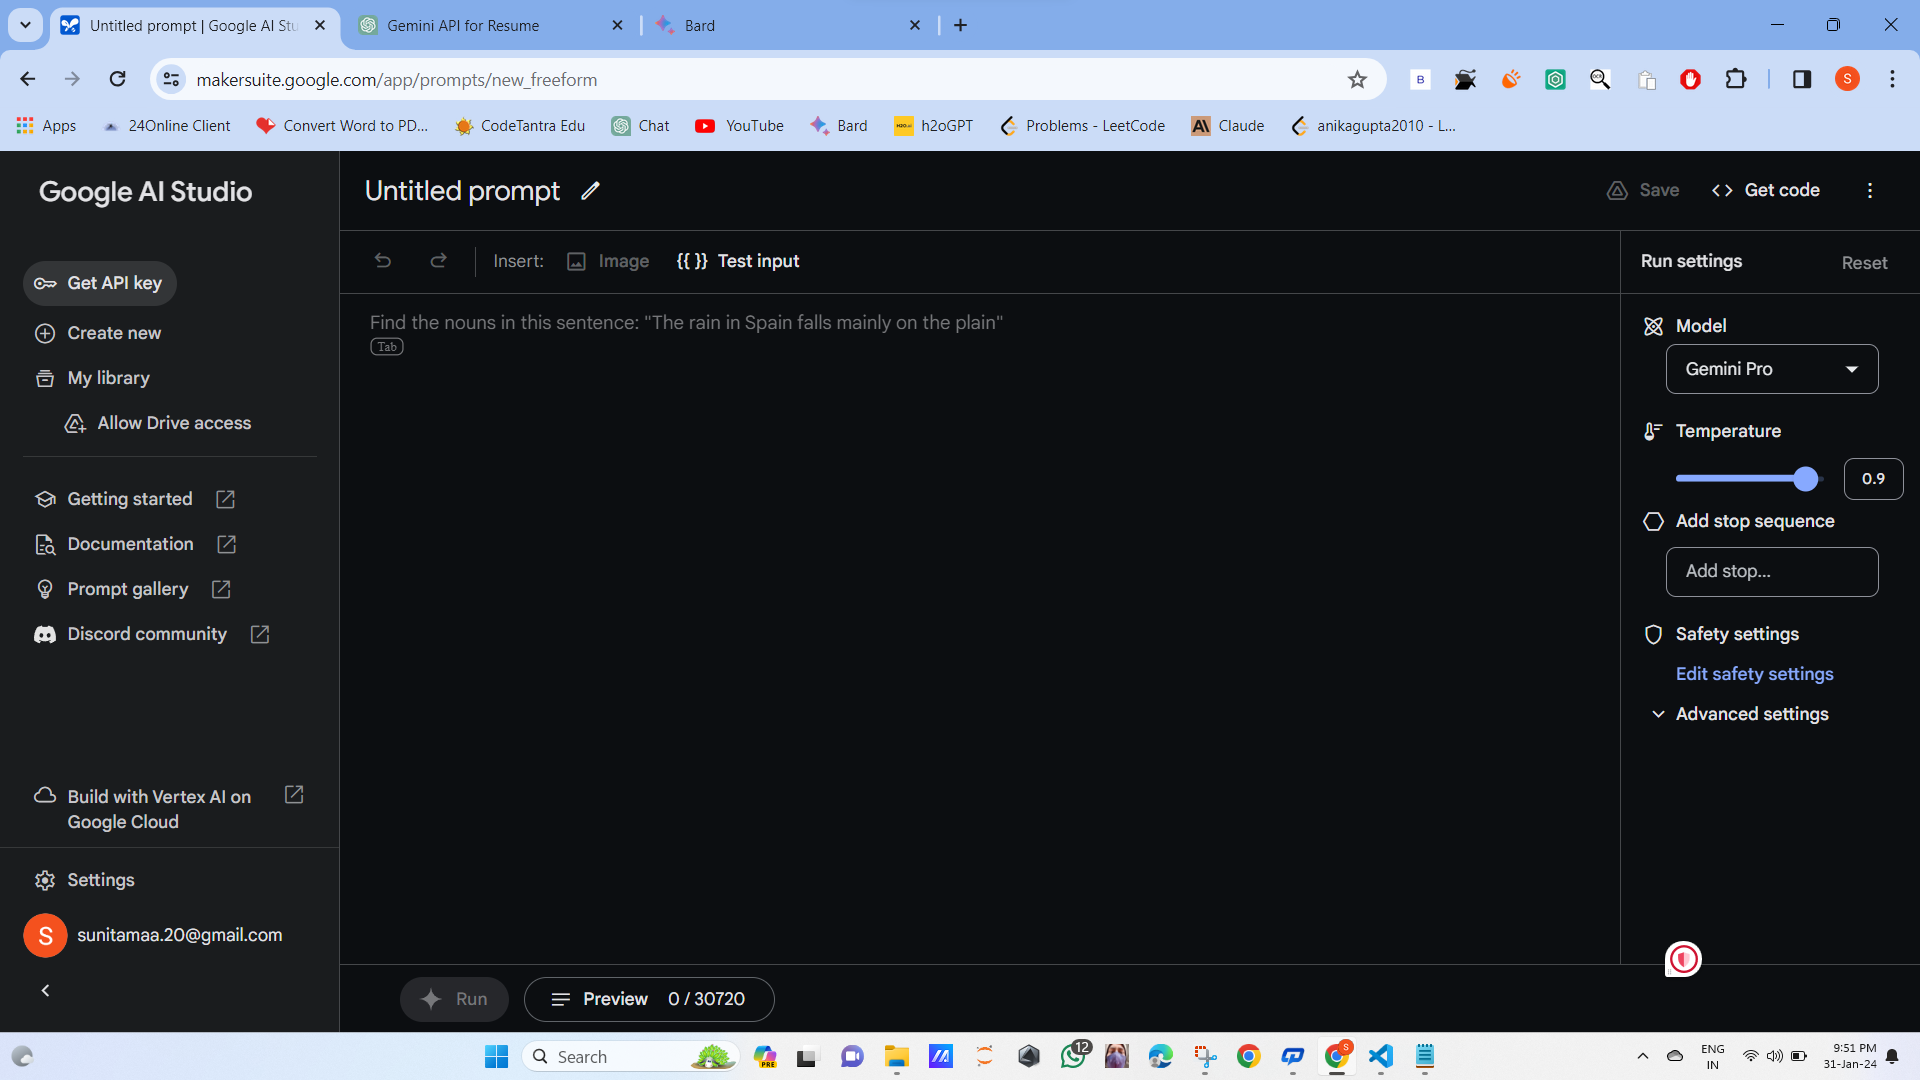

## Press 'Get API Key'

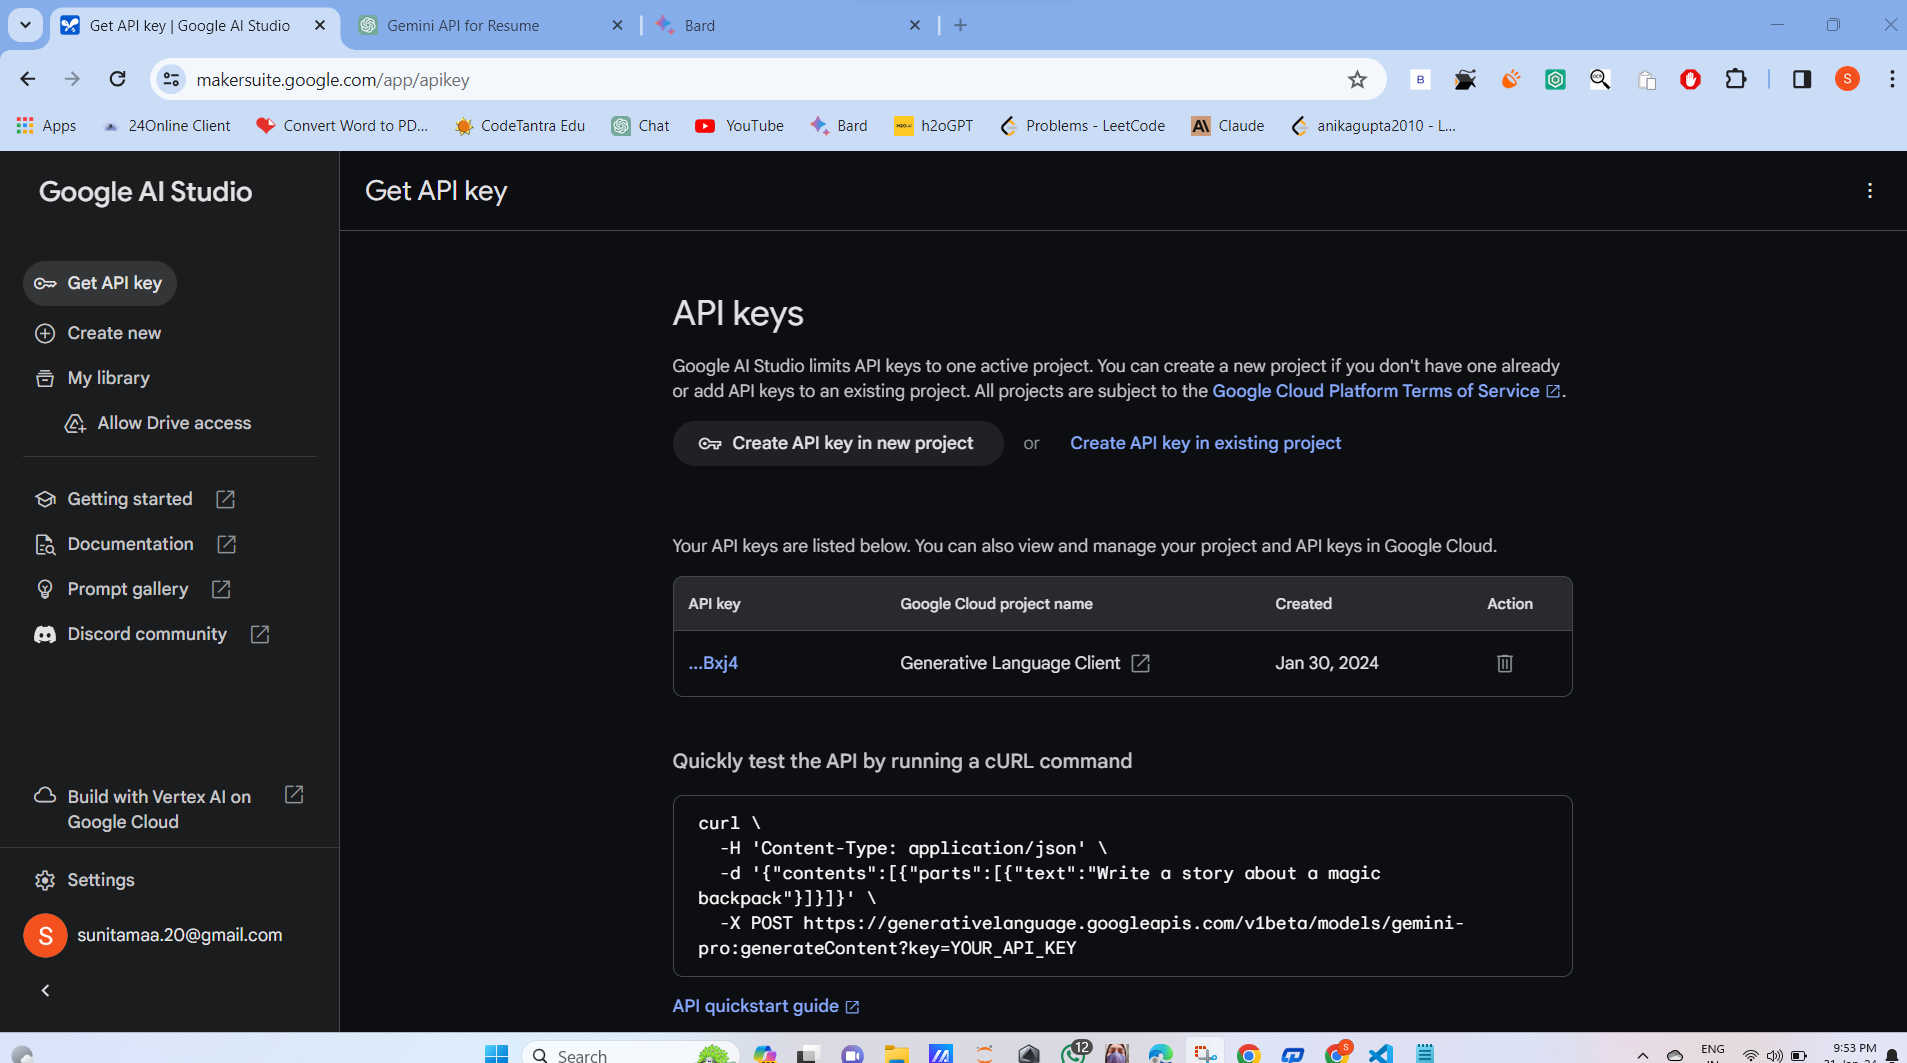

## Copy the api_key

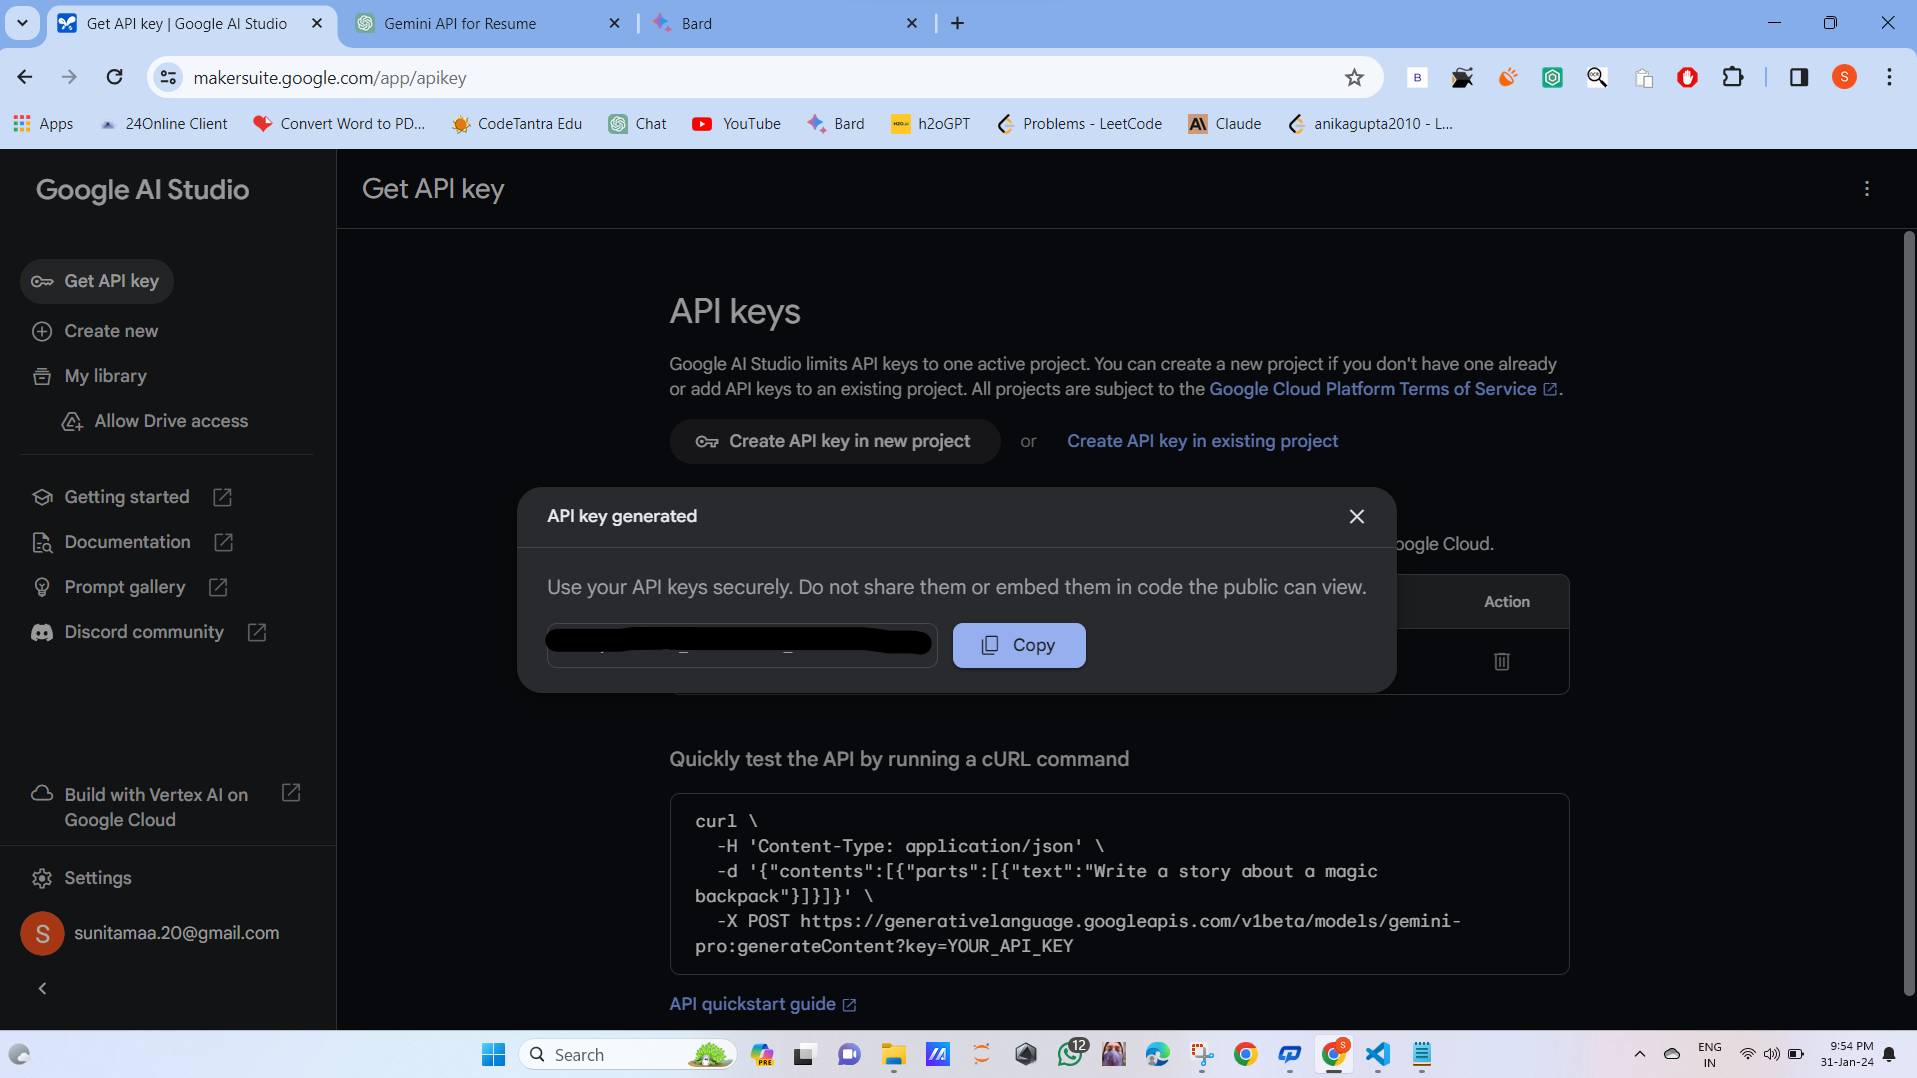

# For tesseract .exe file use
https://github.com/UB-Mannheim/tesseract/wiki

In [13]:
! pip install pytesseract
! pip install pdf2image
! apt-get install poppler-utils
! apt-get install tesseract-ocr

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
import io
import pytesseract
from pdf2image import convert_from_path
 
def extract_text_from_pdf(pdf_path):
    # Convert PDF to image
    pages = convert_from_path(pdf_path, 500)
     
    # Extract text from each page using Tesseract OCR
    text_data = ''
    for page in pages:
        text = pytesseract.image_to_string(page)
        text_data += text + '\n'
     
    # Return the text data
    return text_data
 
text = extract_text_from_pdf('DIKESH RAY.pdf')
print(text)

PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?

# Text to text using Gemini


In [14]:
import requests
import json

# Replace 'YOUR_API_KEY' with your actual API key
API_KEY = "YOUR_API_KEY"

url = f"https://generativelanguage.googleapis.com/v1/models/gemini-pro:generateContent?key={API_KEY}"

payload = {
    "contents": [
        {
            "role": "user",
            "parts": [{"text": '''Use the ner model in the resume extraction model such that it will obtain the json header
                       file as class name of  fields like Name, Email, Phone, Skills, Education, Experience?'''}]
        }
    ]
}

headers = {'Content-Type': 'application/json'}

response = requests.post(url, data=json.dumps(payload), headers=headers)

print(response.json())


{'candidates': [{'content': {'parts': [{'text': 'To utilize a Named Entity Recognition (NER) model in a resume extraction model to obtain a JSON header file with class names for fields like Name, Email, Phone, Skills, Education, and Experience, follow these steps:\n\n**1. Data Preparation:**\n\n- Gather a large and diverse dataset of resumes in various formats (PDF, Word, plain text, etc.).\n- Label the data with relevant entities and their corresponding classes, such as "Name," "Email," "Phone," "Skills," "Education," and "Experience."\n\n**2. Preprocessing:**\n\n- Clean the resumes by removing unnecessary formatting and noise.\n- Tokenize the text into individual words or n-grams.\n- Convert the tokens into lowercase and remove punctuation.\n\n**3. NER Model Training:**\n\n- Select an appropriate NER model architecture, such as BiLSTM-CRF or BERT-CRF.\n- Train the model on the labeled resume dataset using a suitable loss function and optimizer.\n- Tune the hyperparameters to optimize

In [22]:
response = requests.post(url, data=json.dumps(payload), headers=headers)

response_text = json.dumps(response.json(), indent=2)

response_lines = response_text.split('\n')

with open('response.txt', 'w') as file:
    file.write(response_text)


# Image + Text to Text

In [5]:
import base64

def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        base64_encoded = base64.b64encode(image_file.read()).decode('utf-8')
    return base64_encoded

image_path = 'image_path'
base64_data = image_to_base64(image_path)

print(base64_data)


iVBORw0KGgoAAAANSUhEUgAAAowAAAB+CAYAAACu9kDtAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAABhaVRYdFNuaXBNZXRhZGF0YQAAAAAAeyJjbGlwUG9pbnRzIjpbeyJ4IjowLCJ5IjowfSx7IngiOjY1MiwieSI6MH0seyJ4Ijo2NTIsInkiOjEyNn0seyJ4IjowLCJ5IjoxMjZ9XX1haineAAAv3klEQVR4Xu2dTWscR9f3z/VwfwNBJBLjyMZgMGhjLaIoJMTOSggG5FWYa6XFLEwioxgEiWwQglhZCBLFMhgyC/MsMk9WMhlQtMoLMVG8iLKwuAUC48jBdmQTfQY9p966q6q7q19mNJLs/w/amu6prjp16lT1qTrV4//sMwQAAAAAAEAG/0f/BQAAAAAAIBU4jAAAAAAAIAgcRgAAAAAAEAQOIwAAAAAACAKHEQAAAAAABIHDCAAAAAAAgsBhBAAAAAAAQeAwAgAAAACAIHAYAQAAAABAEDiMAAAAAAAgCBxGAAAAAAAQBA4jAAAAAAAIAocRAAAAAAAEgcMIAAAAAACC9NxhbH98iUYuho+rd59zyk26GX0GiiOsk901usqy3dzQ511ic4lt4uM12tPnxx/Vht3S097dzw5cP7KMi02W/PDoRT0PCmnDS7b2nqtx0LnWKTrPTB0d9tjRo/I3monnSXx8Ru1dna5nqHqnyxMf3R43yyJtVMjyUo21KUj7iO3AHdsOol++XPTcYazdWqH7P5njNs2eExfnrWsr9OVEv0oMAADgJWCIrvRwbK8v2s8Zc3xBtQGdoGeoescyzFOdr45O3baurdCVYZX6UGAnqtE+S7MtluXWGPXpy68CfRNfsP4b3EqgCAhJAwAAAK8oe38/4n9P06meO9PguHEMHMYXbhg7Zbk4Wk7XR97yflZ6tTzt3a9DrfFSvV62ju73whxmyXtD32en

In [7]:
import base64
import requests
import json

def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        base64_encoded = base64.b64encode(image_file.read()).decode('utf-8')
    return base64_encoded

image_path = 'image_path'
base64_data = image_to_base64(image_path)

API_KEY = "YOUR_API_KEY"

# Define the URL
url = f"https://generativelanguage.googleapis.com/v1/models/gemini-pro:generateContent?key={API_KEY}"

payload = {
    "contents": [
        {
            "role": "user",
            "parts": [
                {
                    "text": '''Extract the text from this image''',
                    "images": [base64_data]
                }
            ]
        }
    ]
}

headers = {'Content-Type': 'application/json'}

response = requests.post(url, data=json.dumps(payload), headers=headers)

formatted_response = json.dumps(response.json(), indent=2)
print(formatted_response)

with open('response.txt', 'w') as file:
    file.write(formatted_response)


{
  "error": {
    "code": 400,
    "message": "Invalid JSON payload received. Unknown name \"images\" at 'contents[0].parts[0]': Cannot find field.",
    "status": "INVALID_ARGUMENT",
    "details": [
      {
        "@type": "type.googleapis.com/google.rpc.BadRequest",
        "fieldViolations": [
          {
            "field": "contents[0].parts[0]",
            "description": "Invalid JSON payload received. Unknown name \"images\" at 'contents[0].parts[0]': Cannot find field."
          }
        ]
      }
    ]
  }
}


## Gemini not worked for text present on image

# Using pytesseract

In [14]:
pip install pytesseract


Note: you may need to restart the kernel to use updated packages.


In [17]:
from PIL import Image
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'
image_path = 'image_path'

extracted_text = pytesseract.image_to_string(Image.open(image_path))

print("Extracted Text:")
print(extracted_text)



Extracted Text:
Iris-Classification (Public

Iris Flower Classification

@ Jupyter Notebook Updated 3 weeks ago

House-Price-Prediction | Pubiic

‘A general House Price Prediction using Keras/Tensorflow with proper data

visualizations

@ Jupyter Notebook IB MIT License Updated 3 weeks ago



# **** START ****

In [28]:
from PIL import Image
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'

image_path1 = 'test_images/img7a.png'
image_path2 = 'test_images/img7b.png'
image_path3 = 'test_images/img7c.png'
image_path4 = 'test_images/img7d.png'

extracted_text1 = pytesseract.image_to_string(Image.open(image_path1))
extracted_text2 = pytesseract.image_to_string(Image.open(image_path2))
extracted_text3 = pytesseract.image_to_string(Image.open(image_path3))
extracted_text4 = pytesseract.image_to_string(Image.open(image_path4))


In [11]:
extracted_text = extracted_text1 + extracted_text2 + extracted_text3 + extracted_text4
# extracted_text = extracted_text.split('\n')
print(extracted_text)
with open('response.txt', 'w') as file:
    file.write(extracted_text)

Dikesh Ray Mobile no-7827137507
Email: Dikesh.ray@gmail.com

OBJECTIVE
Appetite to learn new things, Team player with Strong analytical and leadership skills, Problem-
solving and decision-making skills. A person waiting to take up the challenging assignments and
‘meet the requirements in total and on ti

Work Experience:
© Working with BLS international Services Itd. as a Software Developer from 05"
June 2017 to till date.
© Working with BRAWN SOFTECH. as a Software Developer from 20" September 2016
to 31" March 2017.
© Working with HYBEC IT SOLUTIONS LIMITED. as a Software Developer from 01"
June 2015 to 31" August 2016.

Trainee Experience:
Six months Industrial Training in Microsoft .Net at Swarnim InfoSoft Pvt. Ltd.,

Noida (U.P).
TECHNICAL SKILLS
Technical Domain Technologies Used ‘Total Experience (¥rs.)
Language cH 45
Web Technologies ASP.Net, JavaScript, HTML 45
Web Services, WCF, JQuery, Json and Ajax 4
AngularJS, MVC, Ms Azure 2
Databases SQL Server, 4
IDE Tools Visual Studi

In [25]:
import requests
import json

# Replace 'YOUR_API_KEY' with your actual API key
API_KEY = "YOUR_API_KEY"

url = f"https://generativelanguage.googleapis.com/v1/models/gemini-pro:generateContent?key={API_KEY}"

response_file_path = 'path_file'

with open(response_file_path, 'r') as file:
    resume_text = file.read()

payload = {
    "contents": [
        {
            "role": "user",
            "parts": [{"text": resume_text}]
        }
    ]
}

headers = {'Content-Type': 'application/json'}

response = requests.post(url, data=json.dumps(payload), headers=headers)

formatted_response = json.dumps(response.json(), indent=2)
print(formatted_response)



{
  "candidates": [
    {
      "content": {
        "parts": [
          {
            "text": "# Dikesh Ray\n**Mobile:** 7827137507\n**Email:** Dikesh.ray@gmail.com\n\n## Objective\n\nSeeking challenging assignments in the field of Software Development with a reputed organization to utilize my technical expertise to contribute to the growth of the company and enhance my professional skills.\n\n## Work Experience\n\n### BLS International Services Itd., Software Developer [June 2017 - Present]\n- Developed and maintained software applications using ASP.Net, C#, Visual Studio, and SQL Server.\n- Collaborated with a team of developers to design, implement, and test new features.\n- Worked on multiple projects simultaneously, managing time and resources effectively.\n- Provided technical support to users and resolved their issues promptly.\n\n### BRAWN SOFTECH., Software Developer [September 2016 - March 2017]\n- Developed and maintained web applications using ASP.Net, C#, JavaScript, HTM

In [27]:
import re
import json

with open('response.txt', 'r') as file:
    response_text = file.read()

pattern = r'(?i)(Name|Email|Phone|Skills|Education|Experience)[:\s]+([^\n]+)'

matches = re.findall(pattern, response_text)

extracted_features = {}

for match in matches:
    key = match[0].strip()
    value = match[1].strip()
    extracted_features[key] = value

with open('extracted_features.json', 'w') as json_file:
    json.dump(extracted_features, json_file, indent=2)

print("Extraction completed. Extracted features saved in 'extracted_features.json'.")


Extraction completed. Extracted features saved in 'extracted_features.json'.


# Summarization

In [ ]:
vector dd / azure indexing
